<h2>Load data</h2>

In [1]:
from numpy import loadtxt

# load data
import pandas as pd
df = pd.read_csv('data/diabetes_pca.csv')
np_data = df.values

# split data into X and y
X = np_data[:,0:-1]
Y = pd.factorize(np_data[:,-1])[0]

# set seed to randomizer
seed = 7

<h2>Function for evaluating model accuracy</h2>

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    predictions = [round(value) for value in y_pred]
    # calculate accuracy
    accuracy = accuracy_score(Y, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    
    print("")
    print("-- 10-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=10)
    # calculate accuracy
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Y, predictions)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)

<h2>Linear classifier</h2>

In [6]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=2500, random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 73.70%
Confusion Matrix:
[[ 99 169]
 [ 33 467]]

-- 10-fold CV --
Average accuracy: 72.53%
Confusion Matrix:
[[132 136]
 [ 75 425]]


<h2>Neural Network classifier</h2>

In [16]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=500, random_state=seed, learning_rate_init=0.1)
evaluate(model)

-- Training data --
Accuracy: 71.74%
Confusion Matrix:
[[ 91 177]
 [ 40 460]]

-- 10-fold CV --
Average accuracy: 67.84%
Confusion Matrix:
[[ 93 175]
 [ 72 428]]


<h2>Decision Tree classifier</h2>

In [17]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(min_samples_leaf=10, max_depth=8, random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 80.21%
Confusion Matrix:
[[181  87]
 [ 65 435]]

-- 10-fold CV --
Average accuracy: 69.66%
Confusion Matrix:
[[153 115]
 [118 382]]


<h2>SVM classifier</h2>

In [26]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 99.87%
Confusion Matrix:
[[267   1]
 [  0 500]]

-- 10-fold CV --
Average accuracy: 64.71%
Confusion Matrix:
[[  0 268]
 [  3 497]]


<h2>kNN classifier</h2>

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=3)
evaluate(model)

-- Training data --
Accuracy: 84.51%
Confusion Matrix:
[[193  75]
 [ 44 456]]

-- 10-fold CV --
Average accuracy: 68.36%
Confusion Matrix:
[[129 139]
 [104 396]]


<h2>XGBoost classifier</h2>

In [21]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 84.51%
Confusion Matrix:
[[180  88]
 [ 31 469]]

-- 10-fold CV --
Average accuracy: 71.74%
Confusion Matrix:
[[131 137]
 [ 80 420]]


<h2>Plot attributes</h2>

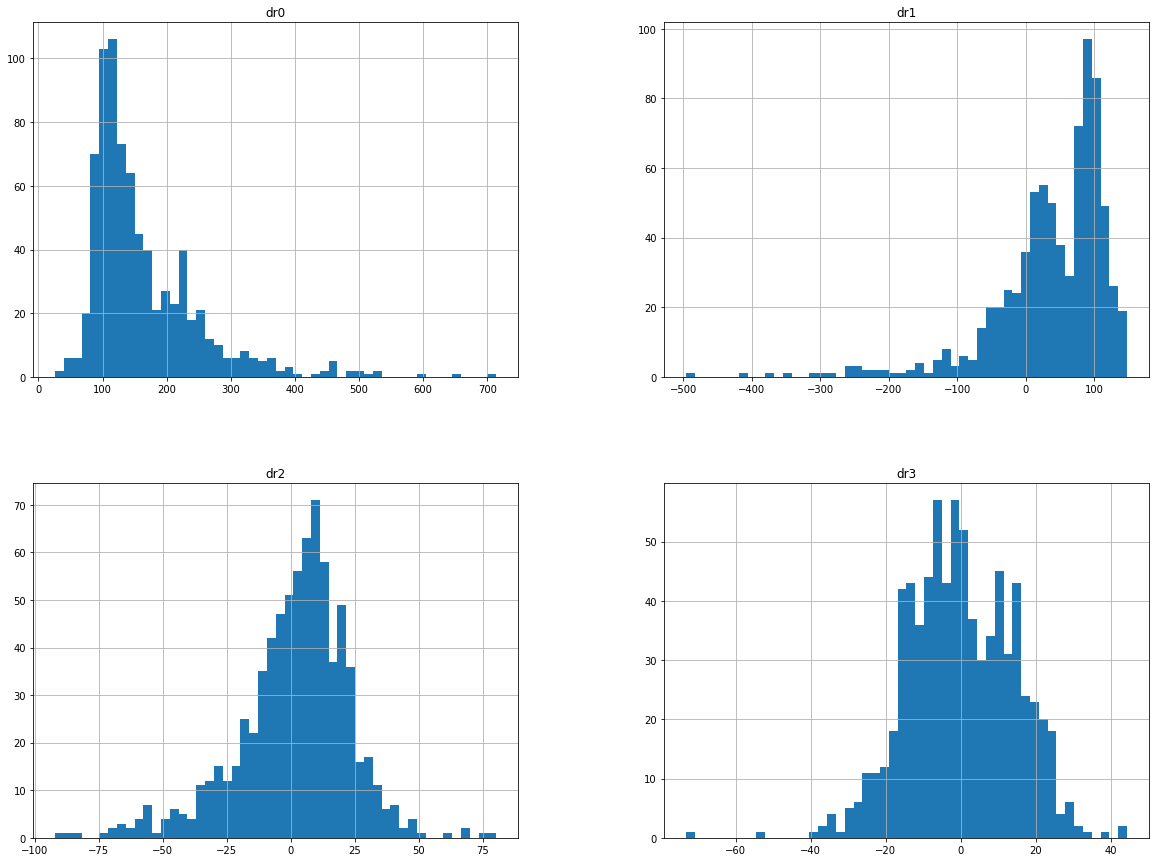

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()